##*Elizabeth Torres Torrecillas* 

# *Actividad 9*



---

---

---







In [558]:
#Importar bibliotecas a utilizar 
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
from numpy.linalg import matrix_power as mpow
from scipy.integrate import odeint, solve_ivp


**Ejercicio 1.** 

\begin{eqnarray*}
\frac{d x}{d t} & = & y  \\
\frac{d y}{dt } & = & -x   \\
\end{eqnarray*}

De forma matricial tenemos que:
\begin{equation*}
 A
 =
  \begin{bmatrix}
   0 & 1 \\
   -1 & 0
   \end{bmatrix}
\end{equation*}

In [559]:
#Declaramos la matriz A
#Siendo esta de la forma [[0,1],[-1,0]]
A = np.array([[0,1],[-1,0]])
print(A)

#Determinamos los eigenvalores de la matriz A
eigvalsA, eigvecsA= la.eig(A)
print("Eigenvalores:", eigvalsA)

#Determinamos la traza de la matriz A
tr = np.trace(A)
print("Traza de la matriz:",tr)

[[ 0  1]
 [-1  0]]
Eigenvalores: [0.+1.j 0.-1.j]
Traza de la matriz: 0


* El punto crítico es **centro**

 $a=0$

 $ b>0 $
 
 $\mathrm{Tr}(A) = 0$

* Las raíces pertenecen al dominio complejo, de la forma: 

\begin{equation*}
\lambda_{} = a \pm i b
\end{equation*}


In [560]:
#Resolvemos el sistema homogéneo 
B1 = np.zeros((2,1))
solu = la.solve(A,B1)
print("Solución es:x = ", solu[0], "y = ",solu[1])

Solución es:x =  [-0.] y =  [0.]


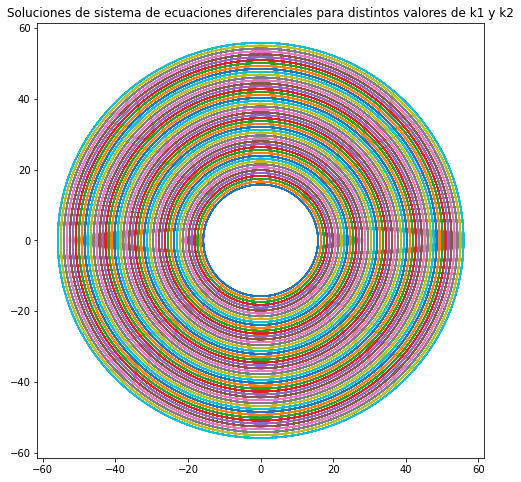

In [561]:
#Soluciones
#Definimos la función, siendo k1 y k2 constantes arbitrarias
#t es la variable 
def f(t,k1,k2):
  #Como las raíces pertenecen al dominio complejo
  #Las escribimos de la forma:
  R1=  k1*np.cos(t) + k2*np.sin(t)
  R2= -k1*np.sin(t) + k2*np.cos(t)
  R=[R1,R2]
  return R

t=np.linspace(0,50,800)
k1=list(np.linspace(5,25,50))
k2=list(np.linspace(15,50,50))
plt.figure(figsize=(8,8))
for k11,k22 in zip(k1,k2):
  v=f(t,k11,k22)
  sol=np.array(v)
  plt.plot(sol[0,:],sol[1,:])
  plt.title(('Soluciones de sistema de ecuaciones diferenciales para distintos valores de k1 y k2'))

**Ejercicio 2.** 

\begin{eqnarray*}
\frac{d x}{d t} & = & y  \\
\frac{d y}{dt } & = &  x  \\
\end{eqnarray*}

De forma matricial tenemos que:
\begin{equation*}
 A
 =
  \begin{bmatrix}
   0 & 1 \\
   1 & 0
   \end{bmatrix}
\end{equation*}

In [562]:
#Declaramos la matriz A
#Siendo esta de la forma [[0,1],[-1,0]]
A = np.array([[0,1],[1,0]])
print(A)

#Determinamos los eigenvalores de la matriz A
eigvalsA, eigvecsA= la.eig(A)
print("Eigenvalores:", eigvalsA)
#Determinamos los eigenvectores de la matriz A
v1 = eigvecsA[:,0]
v2 = eigvecsA[:,1]
print("Eigenvectores:" )
print('v1=',v1)
print('v2=',v2)

#Determinamos la traza de la matriz A
tr = np.trace(A)
print("Traza de la matriz:",tr)

[[0 1]
 [1 0]]
Eigenvalores: [ 1.+0.j -1.+0.j]
Eigenvectores:
v1= [0.70710678 0.70710678]
v2= [-0.70710678  0.70710678]
Traza de la matriz: 0



La solución del sistema de ecuaciones diferenciales es de la forma:

\begin{equation*}
x(t) = k_1 e^{\lambda t} \ {v_1} + k_2e^{\mu t} \ {v_2}
\end{equation*}

 Donde:
* ${v_1}$ y ${v_2}$ son los eigenvectores correspondentes a los eigenvalores $\lambda$ y $\mu$

* $k_1$ y $k_2$ constantes.

In [563]:
#Resolvemos el sistema homogéneo 
B = np.zeros((2,1))
solu = la.solve(A,B)
print("Solución es:x = ", solu[0], "y = ",solu[1])

Solución es:x =  [0.] y =  [0.]


Tenemos que en el punto (x,y)=(0,0) es un **Punto Silla**
Siendo:
\begin{equation*}
   \begin{bmatrix}
   x  \\
   y 
   \end{bmatrix}
 =
  \begin{bmatrix}
   k_1e^t & k_2e^-t \\
   k_1e^t & -k_2e^-t
   \end{bmatrix}
\end{equation*}

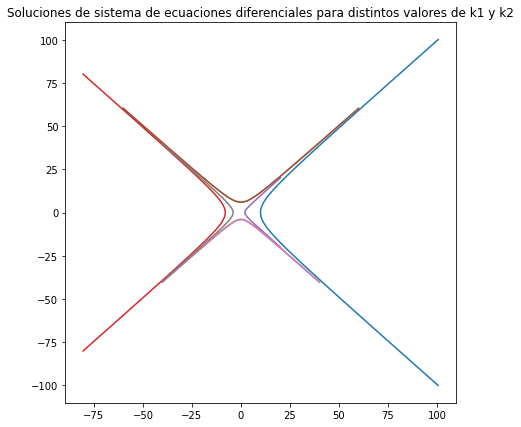

In [589]:
#Soluciones
#Definimos la función, siendo k1 y k2 constantes arbitrarias
#t es la variable 
def x(t,k1,k2):
  #Como las raíces pertenecen al dominio real
  #Las escribimos de la forma:
  R2 =  [k1*np.exp(t)+k2*np.exp(-t), k1*np.exp(t)-k2*np.exp(-t)]
  return R2

t=np.linspace(-3,3,400)
k1=[5,3,-2,-4,1,3,-2,-2]
k2=[5,-3,2,-4,1,-3,2,-2]
plt.figure(figsize=(7,7))

for k11,k22 in zip(k1,k2):
  v=x(t,k11,k22)
  sol=np.array(v)
  plt.plot(sol[0,:],sol[1,:])
  plt.title(('Soluciones de sistema de ecuaciones diferenciales para distintos valores de k1 y k2'))

**Ejercicio 3.** 

\begin{eqnarray*}
\frac{d^2 x}{d t^2} + \omega_0^2 x & = & 0, \ \omega_0 > 0  \\
\end{eqnarray*}

Siendo

$$\begin{eqnarray*}
\frac{d x}{d t} = y \\
\frac{d y}{dt} = -\omega_0^2 x  \\
\end{eqnarray*}$$

Donde los eigenvalores son de la  forma 
\begin{equation*}
\lambda =  \pm w_0i
\end{equation*}

In [565]:
#Notamos que la traza de A es cero y el término real es cero
#Podemos decir que el punto crítico es tipo Centro

#Definimos arbitrariamente w0, una constante positiva para determinar los eigenvalores
#De la matriz [[0,1],[w0,0]] 
#Elegimos a w0 como 5
w0=5
C=np.array([[0,1],[w0,0]])
B1=np.zeros((2,1))
solu=la.solve(C,B1)
#Siendo la solución de la forma x,y
print('x = ',solu[0],'\n','y = ',solu[1])


x =  [0.] 
 y =  [0.]


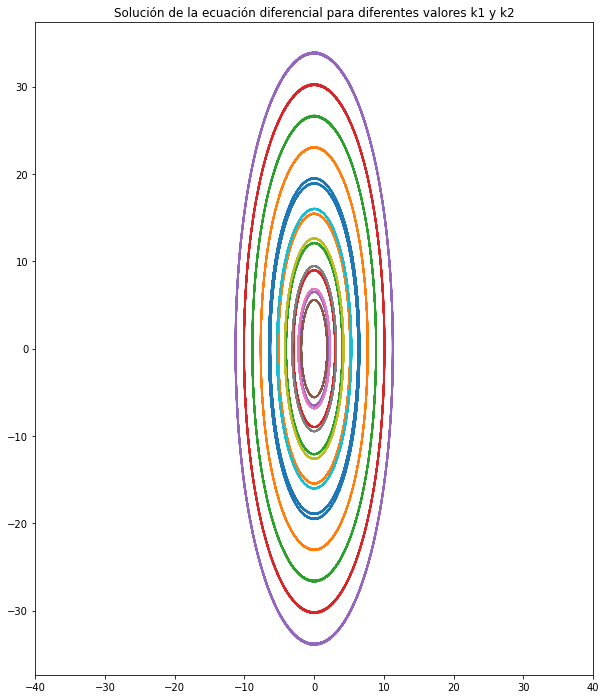

In [566]:
#Soluciones
#Definimos la función, siendo k1 y k2 constantes arbitrarias
#t es la variable 
w0 = 3
def f(t,k1,k2,w0):
      Solu = [k1*np.cos(w0*t)+k2*np.sin(w0*t),-k1*w0*np.sin(w0*t)+k2*w0*np.cos(w0*t)]
      return Solu

t = np.linspace(-10,25,500)
k1 = list(np.linspace(-2,8,15))
k2 = list(np.linspace(6,-8,15))

plt.figure(figsize=(10,12))
for k11,k21 in zip(k1,k2):
  v=f(t,k11,k21,w0)
  Solu=np.array(v)
  plt.plot(Solu[0,:],Solu[1,:])
  plt.xlim(-40,40)
  plt.title(('Solución de la ecuación diferencial para diferentes valores k1 y k2'))

**Ejercicio 4.** 

\begin{eqnarray*}
\frac{d x}{d t} & = & -2 x  \\
\frac{d y}{dt } & = &  2 z  \\
\frac{d z}{dt } & = &  - 2 y  \\
\end{eqnarray*}

* La variable x es independiente de y, z. Podemos tratarlo como un sistema a parte.

* De forma que la clasificación del punto crítico se puede obtener mediante un subsistema compuesto por la variable y, z.

\begin{eqnarray*}
\frac{d y}{dt } & = &  2 z  \\
\end{eqnarray*}


\begin{eqnarray*}
\frac{d z}{dt } & = &  - 2 y  \\
\end{eqnarray*}



In [567]:
#Sistema de ecuaciones diferenciales inicial x,y,z 
MatrixI = np.array([[-2,0,0],[0,0,2],[0,-2,0]])
#Sistema de ecuaciones dependientes y, z
MatrixD= np.array([[0,-2],[2,0]])

#Obtenemos los eigenvalores correspondientes
eigenval, eigenvec = la.eig(MatrixI)
print("Eigenvalores de la matriz", eigenval)
eigenval, eigenvec = la.eig(MatrixD)
print("Eigenvalores de la matriz", eigenval)

Eigenvalores de la matriz [ 0.+2.j  0.-2.j -2.+0.j]
Eigenvalores de la matriz [0.+2.j 0.-2.j]


In [568]:
#Determinamos las trazas
trI = np.trace(MatrixI)
trD = np.trace(MatrixD)
print("La traza de la matriz es:",trI)
print("La traza de la matriz es:",trD)

La traza de la matriz es: -2
La traza de la matriz es: 0


In [569]:
#Resolvemos el sistema homogéneo
#Determinamos los puntos críticos
PC=np.zeros((3,1))
SH=la.solve(MatrixI,PC)
SH

array([[-0.],
       [-0.],
       [ 0.]])

Como la ecuación diferencial de x es independiente de y y z, las soluciones son de la forma:

La solución se puede escribir como 

\begin{equation*}
x(t) = k_1e^{-2t} k_2\cos{2t}+k_3\sin{2t}, -k_2\sin{2t}+k_3\cos{2t}
\end{equation*}

A continuación...
* Graficamos el espacio fase en $\mathbb{R}^3$ para algunos de los valores de las constantes arbitarias.



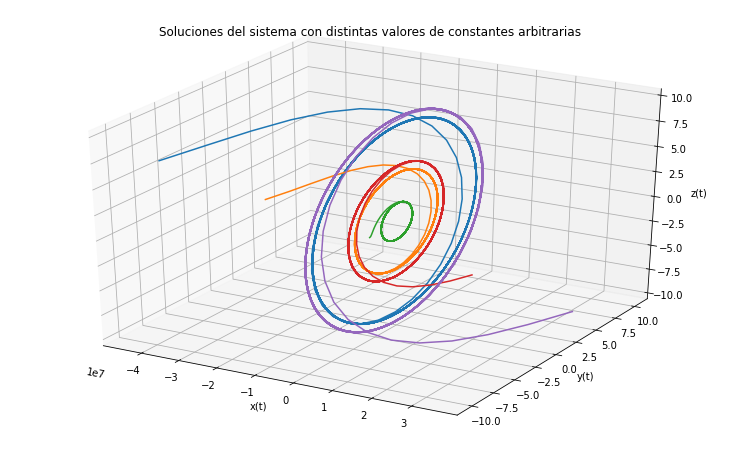

In [570]:
#Definimos la función
#Esta a partir de la solución del sistema
def f(t,k1,k2,k3):
  Solu=[k1*np.exp(-2*t), k2*np.cos(2*t)+k3*np.sin(2*t), -k2*np.sin(2*t)+k3*np.cos(2*t)]
  return Solu
#Definimos los puntos de interés donde se desean determinar los valores de la solución
t=np.linspace(-8,80,800)
#Definimos las constantes arbitrarias 
k1=np.linspace(-5,4,5)
k2=np.linspace(5,-2,5)
k3=np.linspace(-8,10,5)

plt.figure(figsize = ( 13, 8))
ax=plt.axes(projection='3d')
for k11,k21,k31 in zip(k1,k2,k3):
  v=f(t,k11,k21,k31)
  s=np.array(v)
  ax.plot3D(s[0,:],s[1,:],s[2,:])
plt.xlabel('x(t)')
plt.ylabel('y(t)')
ax.set_zlabel('z(t)')
plt.title('Soluciones del sistema con distintas valores de constantes arbitrarias')
plt.grid()
plt.show()

**Ejercicio 5.** 

\begin{eqnarray*}
\frac{d x}{d t} & = & - x + z  \\
\frac{d y}{dt } & = &  3 y  \\
\frac{d z}{dt } & = &  - x - z \\
\end{eqnarray*}

* La variable y es independiente de x, z.  Podemos tratarlo como un sistema a parte.

* De forma que la clasificación del punto crítico se puede obtener mediante un subsistema compuesto por la variable x, z.

\begin{eqnarray*}
\frac{d x}{d t} & = & - x + z  \\
\frac{d z}{dt } & = &  - x - z \\
\end{eqnarray*}

In [571]:
#Sistema de ecuaciones diferenciales inicial x,y,z 
MatrixI2= np.array([[-1,0,1],[0,3,0],[-1,0,-1]])
#Sistema de ecuaciones dependientes x, z
MatrixD2 = np.array([[-1,1],[-1,-1]])

#Obtenemos los eigenvalores correspondientes
eigenval, eigenvec = la.eig(MatrixI2)
print("Eigenvalores de la matriz", eigenval)
eigenval, eigenvec = la.eig(MatrixD2)
print("Eigenvalores de la matriz", eigenval)

Eigenvalores de la matriz [-1.+1.j -1.-1.j  3.+0.j]
Eigenvalores de la matriz [-1.+1.j -1.-1.j]


In [572]:
#Determinamos las trazas
trI2 = np.trace(MatrixI2)
trD2 = np.trace(MatrixD2)
print("La traza de la matriz es:",trI)
print("La traza de la matriz es:",trD)

La traza de la matriz es: -2
La traza de la matriz es: 0


Como la ecuación diferencial de y es independiente de x y z. Además, las soluciones son complejas con una traza de -2.

La solución se puede escribir como 
\begin{equation*}
x(t) = e^{-t} (k_1\cos{t}+k_3\sin{t}),k_2e^{3t} , e^{-t}(k_3\cos{t}-k_1\sin{t})
\end{equation*}

* Notamos que representa a un foco espiral estable.

A continuación...
* Graficamos el espacio fase en $\mathbb{R}^3$ para algunos de los valores de las constantes arbitarias.



In [573]:
#Resolvemos el sistema homogéneo
#Determinamos los puntos críticos
PC=np.zeros((3,1))
SH=la.solve(MatrixI2,PC)
SH

array([[-0.],
       [ 0.],
       [-0.]])

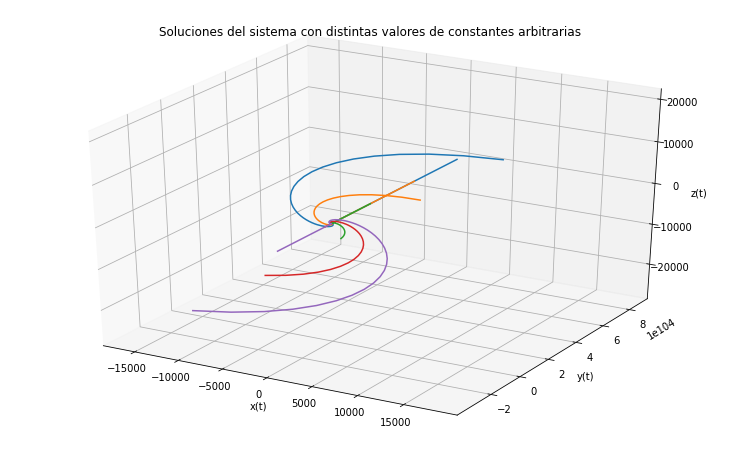

In [574]:
#Definimos la función
#Esta a partir de la solución del sistema
def f(t,k1,k2,k3):
  Solu=[np.exp(-t)*(k1*np.sin(t)+k3*np.cos(t)),k2*np.exp(3*t) ,np.exp(-t)*(k3*np.sin(t)-k1*np.cos(t))]
  return Solu
#Definimos los puntos de interés donde se desean determinar los valores de la solución
t=np.linspace(-8,80,800)
#Definimos las constantes arbitrarias 
k1=np.linspace(-5,4,5)
k2=np.linspace(5,-2,5)
k3=np.linspace(-8,10,5)

plt.figure(figsize = ( 13, 8))
ax=plt.axes(projection='3d')
for k11,k21,k31 in zip(k1,k2,k3):
  v=f(t,k11,k21,k31)
  s=np.array(v)
  ax.plot3D(s[0,:],s[1,:],s[2,:])
plt.xlabel('x(t)')
plt.ylabel('y(t)')
ax.set_zlabel('z(t)')
plt.title('Soluciones del sistema con distintas valores de constantes arbitrarias')
plt.grid()
plt.show()

**Ejercicio 6:**

\begin{eqnarray*}
\frac{d x}{d t} & = & - x  \\
\frac{d y}{dt } & = &  x + 2 y  \\
x(0) = 0, & & y(0) = 3
\end{eqnarray*}

El sistema de forma matricial se puede reescribir como:


$$ \frac{d}{dt}\begin{pmatrix} x \\ y \end{pmatrix} = \begin{pmatrix} -1 & 0 \\ 1 & 2 \end{pmatrix}\begin{pmatrix} x \\ y \end{pmatrix} 
=\begin{pmatrix} -x \\ x+2y \end{pmatrix} $$




In [575]:
#Declaramos la matriz
Matrixx = np.array([[-1,0],[1,2]])
eigvalsA, eigvecsA= la.eig(Matrixx)
print("Eigenvalores:",eigvalsA )
trA = np.trace(Matrixx)
print("Traza de la matriz:",trA)
#Notamos que los eigenvalores son reales, siendo su parte imaginaria nula.

Eigenvalores: [ 2.+0.j -1.+0.j]
Traza de la matriz: 1


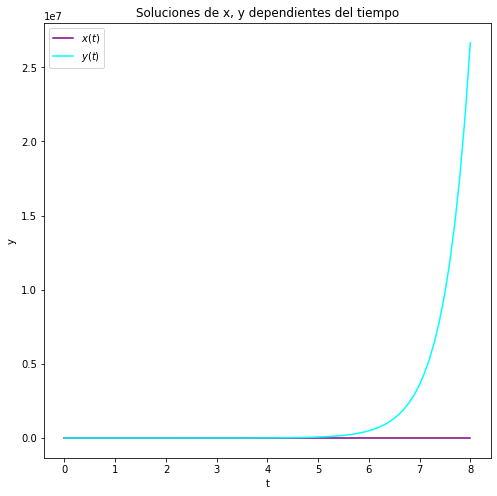

In [576]:
#Definimos la función dx/dt para la solución del sistema
def f(y, t):
  x, v = y
  return [-x, x+2*v]

#Definimos los puntos de interés donde se desean determinar los valores de la solución
t=np.linspace(0,8,80)
#Definimos las condiciones iniciales del sistema
CI=[0,3]

#Graficamos ambas soluciones
plt.figure(figsize = ( 8, 8))
y=odeint(f,CI,t)
plt.plot(t,y[0:,0], 'purple' ,label='$x(t)$')
plt.plot(t,y[0:,1], 'cyan' ,label='$y(t)$')
plt.title('Soluciones de x, y dependientes del tiempo')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

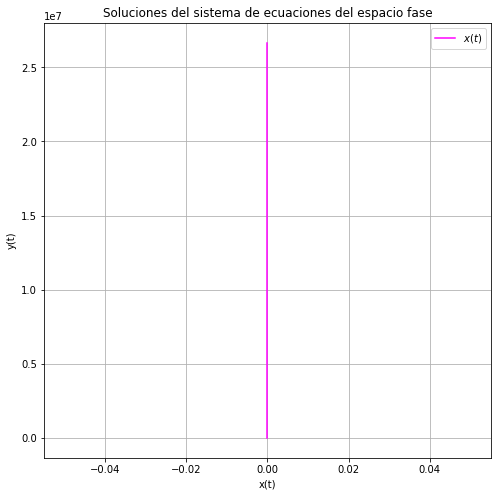

In [577]:
#Graficamos el espacio fase 
plt.figure(figsize=(8,8))
plt.plot(y[0:,0],y[:,1],'magenta',label='$x(t)$')
plt.title('Soluciones del sistema de ecuaciones del espacio fase')
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.legend()
plt.grid()
plt.show()

**Ejercicio 7:**

\begin{eqnarray*}
\frac{d x}{d t} & = & 2 x + y  \\
\frac{d y}{dt } & = &  x +  y  \\
x(1) = 1, & & y(1) = 1
\end{eqnarray*}

El sistema de forma matricial se puede reescribir como:

$$ \frac{d}{dt}\begin{pmatrix} x \\ y \end{pmatrix} = \begin{pmatrix} 2 & 1 \\ 1 & 1 \end{pmatrix}\begin{pmatrix} x \\ y \end{pmatrix}=\begin{pmatrix} 2x+y \\ x+y \end{pmatrix} $$

In [578]:
#Declaramos la matriz
Matrixx = np.array([[2,1],[1,1]])
eigvalsA, eigvecsA= la.eig(Matrixx)
print("Eigenvalores:",eigvalsA )
trA = np.trace(Matrixx)
print("Traza de la matriz:",trA)
#Notamos que los eigenvalores son reales, siendo su parte imaginaria nula.

Eigenvalores: [2.61803399+0.j 0.38196601+0.j]
Traza de la matriz: 3


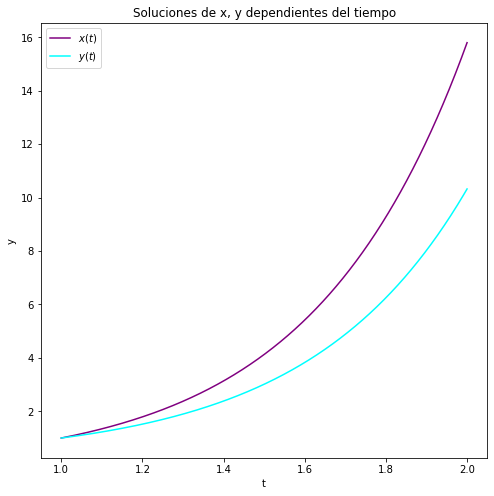

In [594]:
#Definimos la función dx/dt para la solución del sistema
def f(y, t):
  x, v = y
  return [2*x+v, x+v]

#Definimos los puntos de interés donde se desean determinar los valores de la solución
t=np.linspace(1,2,800)
#Definimos las condiciones iniciales del sistema
CI=[1,1]

#Graficamos ambas soluciones
plt.figure(figsize = ( 8, 8))
y=odeint(f,CI,t)
plt.plot(t,y[0:,0], 'purple' ,label='$x(t)$')
plt.plot(t,y[0:,1], 'cyan' ,label='$y(t)$')
plt.title('Soluciones de x, y dependientes del tiempo')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

No handles with labels found to put in legend.


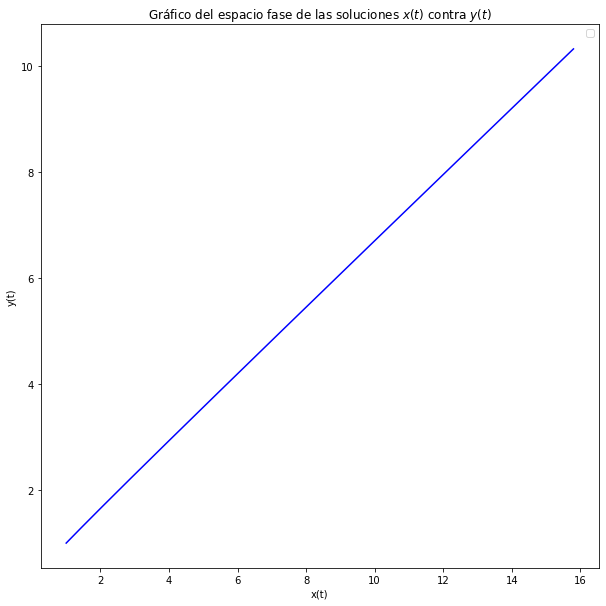

In [595]:
#Graficamos el espacio fase
plt.figure(figsize=(10,10))
y=odeint(f,CI,t)
plt.plot(y[0:,0],y[0:,1],'blue')
plt.title('Gráfico del espacio fase de las soluciones $x(t)$ contra $y(t)$')
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.legend()
plt.show()

**Ejercicio 8:**

\begin{eqnarray*}
\frac{d x}{d t} & = & A x  \\
x(0) & = & (0,3) \\
A & = & \begin{bmatrix}
0 & 3 \\
1 & -2 \\
\end{bmatrix}
\end{eqnarray*}

El sistema de forma matricial se puede reescribir como:

$$ \frac{d}{dt}\begin{pmatrix} x_1 \\ x_2 \end{pmatrix} = \begin{pmatrix} 0 & 3 \\ 1 & -2 \end{pmatrix} =\begin{pmatrix} 3x_2 \\ x_1-2x_2 \end{pmatrix} $$



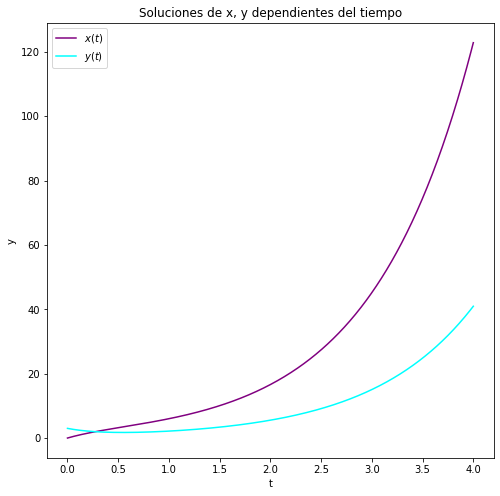

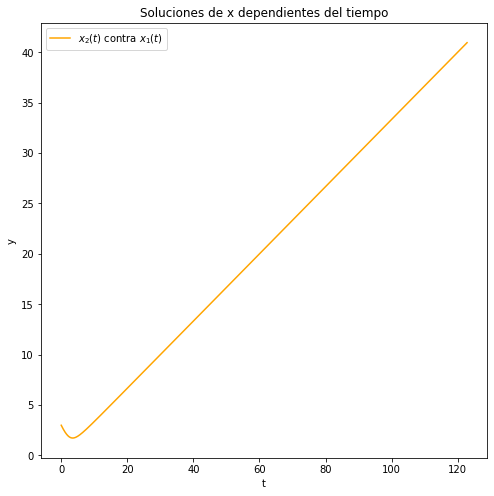

In [580]:
#Definimos la función dx/dt para la solución del sistema
def f(y, t):
  x1, x2 = y
  return [3*x2 , x1-2*x2 ]

#Definimos los puntos de interés donde se desean determinar los valores de la solución
t=np.linspace(0,4,800)
#Definimos las condiciones iniciales del sistema
CI=[0,3]

#Graficamos ambas soluciones
plt.figure(figsize = ( 8, 8))
y=odeint(f,CI,t)
plt.plot(t,y[0:,0], 'purple' ,label='$x(t)$')
plt.plot(t,y[0:,1], 'cyan' ,label='$y(t)$')
plt.title('Soluciones de x, y dependientes del tiempo')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

# Graficamos el espacio fase de las soluciones
plt.figure(figsize=(8,8))
y=odeint(f,CI,t)
plt.plot(y[0:,0],y[0:,1],'orange',label='$x_2(t)$ contra $x_1(t)$')
plt.title('Soluciones de x dependientes del tiempo')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

**Ejercicio 9:**

\begin{eqnarray*}
\frac{d x}{d t} & = & A x  \\
x(0) & = & (0,-b,b) \\
A & = & \begin{bmatrix}
2 & 0 & 0 \\
0 & -1 & 0 \\
0 & 2 & -3 \\
\end{bmatrix}
\end{eqnarray*}

El sistema de forma matricial se puede reescribir como:

$$ \frac{d}{dt}\begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix} = \begin{pmatrix} 2 & 0  & 0 \\ 0 & -1 & 0 \\ 0 & 2 & -3 \end{pmatrix} =\begin{pmatrix} 2x_1 \\ -x_2 \\ 2x_2-3x_3 \end{pmatrix} $$

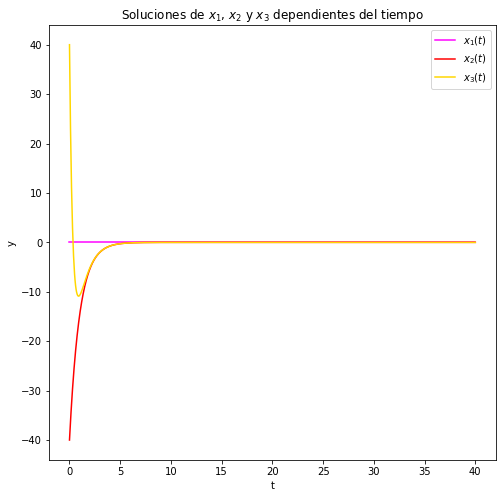

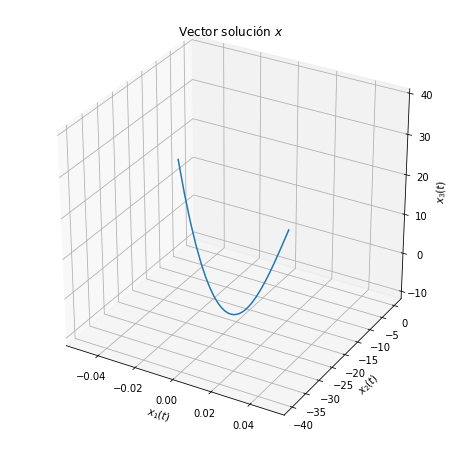

In [581]:
#Definimos la función dx/dt para la solución del sistema
def f(y, t):
  x1, x2, x3 = y
  return [2*x1 , -x2 , 2*x2-3*x3]

#Definimos los puntos de interés donde se desean determinar los valores de la solución
t=np.linspace(0,40,800)
#Definimos las condiciones iniciales del sistema
#Seleccionamos nuestra b
b=40
CI=[0,-b,b]

#Graficamos ambas soluciones
plt.figure(figsize = ( 8, 8))
y=odeint(f,CI,t)
plt.plot(t,y[0:,0], 'magenta' ,label='$x_1(t)$')
plt.plot(t,y[0:,1], 'red' ,label='$x_2(t)$')
plt.plot(t,y[0:,2], 'gold' ,label='$x_3(t)$')
plt.title('Soluciones de $x_1$, $x_2$ y $x_3$ dependientes del tiempo')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

# Graficamos el espacio fase de las soluciones
plt.figure(figsize=(8,8))
y=odeint(f,CI,t)
ax=plt.axes(projection='3d')
ax.plot3D(y[0:,0],y[0:,1],y[0:,2])
ax.set_title('Vector solución $x$')
ax.set_xlabel('$x_1(t)$')
ax.set_ylabel('$x_2(t)$')
ax.set_zlabel('$x_3(t)$')
plt.show()

**Ejercicio 10:** 

Se tiene el siguiente sistema de resortes acoplados con dos masas.  

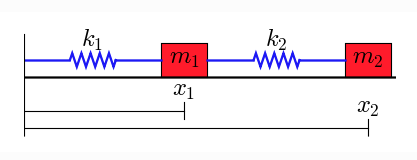


El sistema esta sujeto del primer resorte de la izquierda. Cuando el sistema se deja en reposo, las longitudes de los resortes son $L_1$ y $L_2$.

Las ecuaciones de movimiento estan dadas por las siguientes ecuaciones diferenciales acopladas:

\begin{eqnarray*}
m_1 x_1^{''} + b_1 x_1^{'}+k_1 (x_1-L_1)-k_2(x_2-x_1-L_2) & = & 0 \\
m_2 x_2^{''} + b_2 x_2^{'}+k_2(x_2-x_1-L_2) & = & 0 \\
\end{eqnarray*}

Encuentre las soluciones como funciones de $t$ y grafíquelas, así como las trayectorias en el espacio fase.

Suponga que $L_1=L_2=1$ y que las masas son iguales $m_1=m_2=1$.  




Proponemos un cambio de variable:

$$ v_1=\frac{dx_1}{dt};\; v_2=\frac{dx_2}{dt} $$
Lo que nos queda:

$$ \frac{d}{dt}\begin{pmatrix} x_1 \\ x_2 \\ v_1 \\ v_2 \end{pmatrix} = \begin{pmatrix} 0 & 0 & 1 & 0\\ 0 & 0 & 0 & 1\\ -(k_1+k_2) & k_2 & -b_1 & 0 \\ k_2 & -k_2 & 0 & b_2 \end{pmatrix}\begin{pmatrix} x_1 \\ x_2 \\ v_1 \\ v_2 \end{pmatrix} + \begin{pmatrix} 0 \\ 0 \\ k_1-k_2 \\ k_2 \end{pmatrix} $$


Desarrollando nos queda que:

$$ \frac{d}{dt}\begin{pmatrix} x_1 \\ x_2 \\ v_1 \\ v_2 \end{pmatrix} = \begin{pmatrix} v_1 \\ v_2 \\ -(k_1+k_2)x_1+k_2x_2-b_1v_1+(k_1-k_2) \\ k_2x_1-k_2x_2-b_2v_2+k_2 \end{pmatrix}  $$

**10.1)** Encuentre los eigenvalores del sistema y diga como son las soluciones.  

**10.2)** Caso sin fricción. $b_1=b_2=0$, $k_1=6$, $k_2=4$

* condiciones iniciales

 $(x_1(0), x_1^{'}(0), x_2(0), x_2^{'}(0))=(1,0,2,0)$ 

* **Notamos que en el inciso 10.1 NO NOS PROPORCIONAN VALORES para $k_1$ , $k_2$, 
$b_1$ , $b_2$ . Entonces no podemos dar una solución numérica, por lo que satisfaremos lo que nos pregunta en el inciso 10.1 con los datos proporcionados en el inciso 10.2. Siendo que el inciso a resolver será a partir de juntar el 10.1 y 10.2.**

In [582]:
#Definimos la función dx/dt para la solución del sistema
def f(y, t, k1, k2, b1, b2):
  x1, x2, v1, v2 = y
  der=[v1, v2, -(k1+k2)*x1+k2*x2-b1*v1+k1-k2, k2*x1-k2*x2-b2*v2+k2]
  return der

#Valores dados
b1=b2=0
CI=[0,-b,b]
k1=6
k2=4
#Definimos las condiciones iniciales del sistema
y0=[1,4,0,0]

#Declaramos la matriz de coeficientes 
Matrixx=np.array([[0,0,1,0],[0,0,0,1],[-(k1+k2),k2,-b1,0],[k2,-k2,0,b2]])
eigvalsA, eigvecsA = la.eig(Matrixx)
print("Eigenvalores:",eigvalsA )

Eigenvalores: [-7.84812828e-18+3.46410162j -7.84812828e-18-3.46410162j
  3.56037039e-17+1.41421356j  3.56037039e-17-1.41421356j]


In [583]:
#OBSERVACIONES
#Notamos que los eigenvalores tienen una parte real tan pequeña que se pudiesen considerar como nula
  #Sin embargo debemos tomar en cuenta que estas son distintas del valor cero.
##Notamos que como los valores de a<0<b
  #los puntos críticos son de tipo espiral estable.
##Notamos que como b<0<a
  #los puntos críticos respecto a las velocidades son de tipo espiral inestable

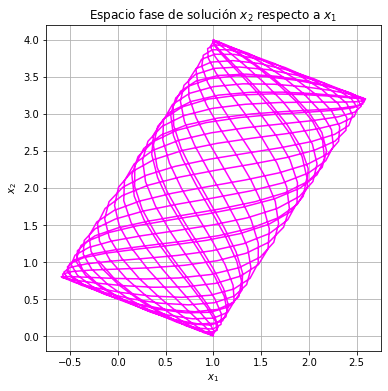

In [584]:
#Espacio fase 
#Aclarando que el espacio fase a mostrar es uno reducido.
#este solo nos visualiza a $x_1$ y $x_2$.

#Definimos los puntos de interés donde se desean determinar los valores de la solución
t=np.linspace(0,56,566)
y=odeint(f,y0,t,args=(k1, k2, b1, b2))
#Graficamos el espacio fase delimitado
plt.figure(figsize=(6,6))
plt.plot(y[0:,0],y[0:,1],color='magenta')
plt.title('Espacio fase de solución $x_2$ respecto a $x_1$')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid()
plt.show()

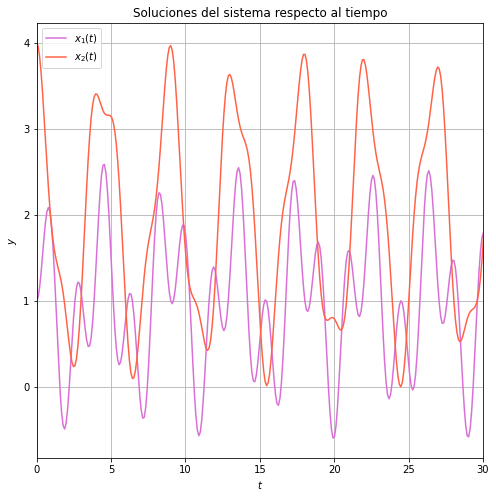

In [585]:
#Graficamos las soluciones del sistema respecto al tiempo 
plt.figure(figsize=(8,8))
plt.plot(t,y[0:,0],color='orchid',label='$x_1(t)$')
plt.plot(t,y[0:,1],color='tomato',label='$x_2(t)$')
plt.title('Soluciones del sistema respecto al tiempo')
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.xlim(0,30)
plt.legend()
plt.grid()
plt.show()

**10.3)** Igual que el caso anterior pero, con fricción: $b_1=0.1, b_2=0.2$

In [586]:
#Definimos la función dx/dt para la solución del sistema
def f(y, t, k1, k2, b1, b2):
  x1, x2, v1, v2 = y
  der=[v1, v2, -(k1+k2)*x1+k2*x2-b1*v1+k1-k2, k2*x1-k2*x2-b2*v2+k2]
  return der

#Valores dados
b1=0.1
b2=0.2
k1=6
k2=4
#Definimos las condiciones iniciales del sistema
y0=[1,4,0,0]

#Declaramos la matriz de coeficientes 
Matrixx=np.array([[0,0,1,0],[0,0,0,1],[-(k1+k2),k2,-b1,0],[k2,-k2,0,b2]])
eigvalsA, eigvecsA = la.eig(Matrixx)
print("Eigenvalores:",eigvalsA )

Eigenvalores: [-0.02012662+3.46155525j -0.02012662-3.46155525j  0.07012662+1.41349145j
  0.07012662-1.41349145j]


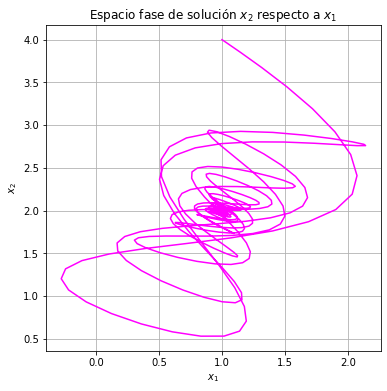

In [587]:
#Definimos los puntos de interés donde se desean determinar los valores de la solución
t=np.linspace(0,56,566)
y=odeint(f,y0,t,args=(k1, k2, b1, b2))
#Graficamos el espacio fase delimitado
plt.figure(figsize=(6,6))
plt.plot(y[0:,0],y[0:,1],color='magenta')
plt.title('Espacio fase de solución $x_2$ respecto a $x_1$')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid()
plt.show()

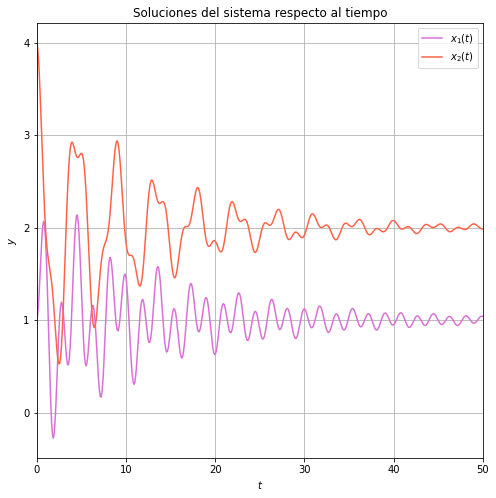

In [588]:
#Graficamos las soluciones del sistema respecto al tiempo 
plt.figure(figsize=(8,8))
plt.plot(t,y[0:,0],color='orchid',label='$x_1(t)$')
plt.plot(t,y[0:,1],color='tomato',label='$x_2(t)$')
plt.title('Soluciones del sistema respecto al tiempo')
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.xlim(0,50)
plt.legend()
plt.grid()
plt.show()